In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import LSTM

from tensorflow.keras.layers import Dropout

In [3]:
total_data = pd.read_csv('./ibm.csv')

In [4]:
scaler = MinMaxScaler()

In [5]:
# Pegando a serie de dados totais
total_data = total_data.iloc[:, 1].values

In [6]:
total_data = scaler.fit_transform(total_data.reshape(-1, 1))

In [7]:
print("Numero total de registros: ", len(total_data))
registros_treinamento = int(len(total_data)*0.9)
print("Numero de registros para treinamento: ", registros_treinamento)

Numero total de registros:  1259
Numero de registros para treinamento:  1133


In [8]:
# Pegando os primeiros 90% dos dados para servirem como treinamento
training_data = total_data[:registros_treinamento]
teste_data = total_data[registros_treinamento:]

In [9]:
print("Numero Registros de treinamento: ", len(training_data))
print("Registros de treinamento: ", training_data)

Numero Registros de treinamento:  1133
Registros de treinamento:  [[0.84100289]
 [0.85142385]
 [0.8414156 ]
 ...
 [0.27383409]
 [0.27383409]
 [0.24288073]]


In [10]:
print("Numero Registros de teste: ", len(teste_data))
print("Registros de teste: ", teste_data)

Numero Registros de teste:  126
Registros de teste:  [[0.24030128]
 [0.23916632]
 [0.24752373]
 [0.24288073]
 [0.24855551]
 [0.24071399]
 [0.24824598]
 [0.23122163]
 [0.21801486]
 [0.22884853]
 [0.2294676 ]
 [0.24803962]
 [0.25629385]
 [0.26465126]
 [0.24391251]
 [0.25588114]
 [0.25340487]
 [0.25299216]
 [0.25835741]
 [0.26227817]
 [0.26454808]
 [0.25474618]
 [0.25877012]
 [0.27496905]
 [0.27744532]
 [0.28270739]
 [0.27197689]
 [0.27187371]
 [0.27166735]
 [0.27311184]
 [0.28054065]
 [0.27992158]
 [0.27507222]
 [0.28786628]
 [0.29116797]
 [0.27723896]
 [0.27847709]
 [0.27744532]
 [0.29127115]
 [0.29446967]
 [0.29116797]
 [0.29075526]
 [0.28931077]
 [0.3017953 ]
 [0.30891457]
 [0.30024763]
 [0.2994222 ]
 [0.29673958]
 [0.29065208]
 [0.39888568]
 [0.42653735]
 [0.43964094]
 [0.44975237]
 [0.42498968]
 [0.38743293]
 [0.3698927 ]
 [0.37226579]
 [0.36421791]
 [0.37009905]
 [0.36772596]
 [0.36855138]
 [0.36070986]
 [0.34368551]
 [0.3395584 ]
 [0.34193149]
 [0.32470078]
 [0.33212959]
 [0.31386

In [11]:
x_training_data = []

y_training_data =[]
x_testing_data = []
y_testing_data = []

In [12]:
# Gera as sequencias de 40 elementos para treinamento
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])

In [13]:
# Gera as sequencias de 40 elementos para confirmar a previsão
for i in range(40, len(teste_data)):
    x_testing_data.append(teste_data[i-40:i, 0])
    y_testing_data.append(teste_data[i, 0])

In [14]:
# Converte os dados de treinamento para Numpy.Array
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

# Converte os dados de teste para Numpy.Array
x_testing_data = np.array(x_testing_data)
y_testing_data = np.array(y_testing_data)

In [15]:
print("X Training Shape: ", x_training_data.shape)
print("Y Training Shape: ", y_training_data.shape)
print("X Teste Shape: ", x_testing_data.shape)
print("Y Training Shape: ", y_testing_data.shape)

X Training Shape:  (1093, 40)
Y Training Shape:  (1093,)
X Teste Shape:  (86, 40)
Y Training Shape:  (86,)


In [16]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 

                                               x_training_data.shape[1], 

                                               1))

In [17]:
x_testing_data = np.reshape(x_testing_data, (x_testing_data.shape[0], 

                                               x_testing_data.shape[1], 

                                               1))

In [25]:
y_testing_data = y_testing_data.reshape(-1, 1)

In [18]:
rnn = Sequential()

In [19]:
for i in [True, True, False]:

    rnn.add(LSTM(units = 45, return_sequences = i))

    rnn.add(Dropout(0.2))

In [20]:
rnn.add(Dense(units = 1))

In [21]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 7s 32ms/step - loss: 0.0642
Epoch 2/100
35/35 [==============================] - 1s 30ms/step - loss: 0.0090
Epoch 3/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0056
Epoch 4/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0056
Epoch 5/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0053
Epoch 6/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0048
Epoch 7/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0049
Epoch 8/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0057
Epoch 9/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0048
Epoch 10/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0048
Epoch 11/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0045
Epoch 12/100
35/35 [==============================] - 1s 31ms/step - loss: 0.0045
Epoch 13/100
35/35 [=====

In [23]:
predictions = rnn.predict(x_testing_data)

3/3 [==============================] - 1s 11ms/step


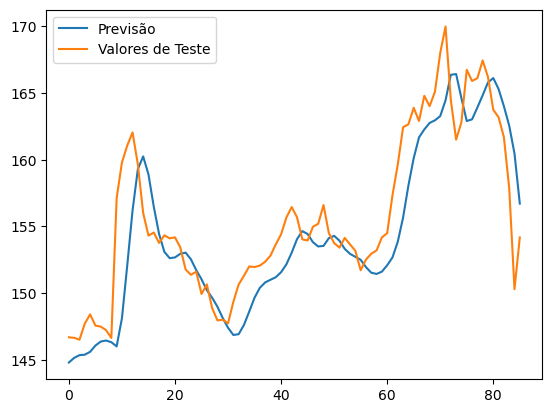

In [26]:
unscaled_predictions = scaler.inverse_transform(predictions)
unscaled_y_testing_data = scaler.inverse_transform(y_testing_data)

plt.clf() #This clears the first prediction plot from our canvas

plt.plot(unscaled_predictions, label="Previsão")
plt.plot(unscaled_y_testing_data, label="Valores de Teste")
plt.legend()
plt.show()

In [39]:
error = abs(predictions - y_testing_data)
error **= 2

In [42]:
error > 0.01

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [